# Importing Libraries

In [208]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
from matplotlib import pyplot

import plotly.graph_objects as go
import plotly.express as px

%matplotlib inline
import missingno as msno

# Loading the Dataset

In [209]:


df = pd.read_csv('diamonds.csv')

## Dataset Information

In [210]:
df.head(5)

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75

In [211]:
df.describe()
# description of dataset

Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000    950.000000   
50%    26970.500000      0.700000     61.800000     57.000000   2401.000000   
75%    40455.250000      1.040000     62.500000     59.000000   5324.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53940.000000  53940.000000  53940.000000  
mean       5.731157      5.734526      3.538734  
std        1.121761      1.142135      0.705699  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000      2.910000  
50%        5.700000      5.710000      3.530000  
75%        6.540000      6.540000      4.040000  
max       10.740000     58.900000     31.800000

In [212]:
df.describe(include='object').T

count unique    top   freq
cut      53940      5  Ideal  21551
color    53940      7      G  11292
clarity  53940      8    SI1  13065

In [213]:
df.info()

# there by are 32 columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [214]:
df.shape

(53940, 11)

In [215]:
df.dtypes

Unnamed: 0      int64
carat         float64
cut            object
color          object
clarity        object
depth         float64
table         float64
price           int64
x             float64
y             float64
z             float64
dtype: object

## Find the Categorical and Numerical dtype

In [216]:
object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)

Index(['cut', 'color', 'clarity'], dtype='object')


In [217]:
for col in object_columns:
    d_type = df[col].dtype

    counts =df[col].value_counts()
    print(f"Counts for {col}:")
    print(counts)
    print("============================================================")

Counts for cut:
cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64
Counts for color:
color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64
Counts for clarity:
clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64


In [218]:
num_columns = df.select_dtypes(include=['float', 'int64']).columns
print(num_columns)

Index(['Unnamed: 0', 'carat', 'depth', 'table', 'price', 'x', 'y', 'z'], dtype='object')


## Dealt with Null Values

In [219]:
df.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

# Exploratory Data Analysis

## UNIVARIATE ans BIVARIATE Analysis Insights:

In [220]:
df = df.drop(['Unnamed: 0'], axis = 1)

In [221]:
df.describe(include="object")

cut  color clarity
count   53940  53940   53940
unique      5      7       8
top     Ideal      G     SI1
freq    21551  11292   13065

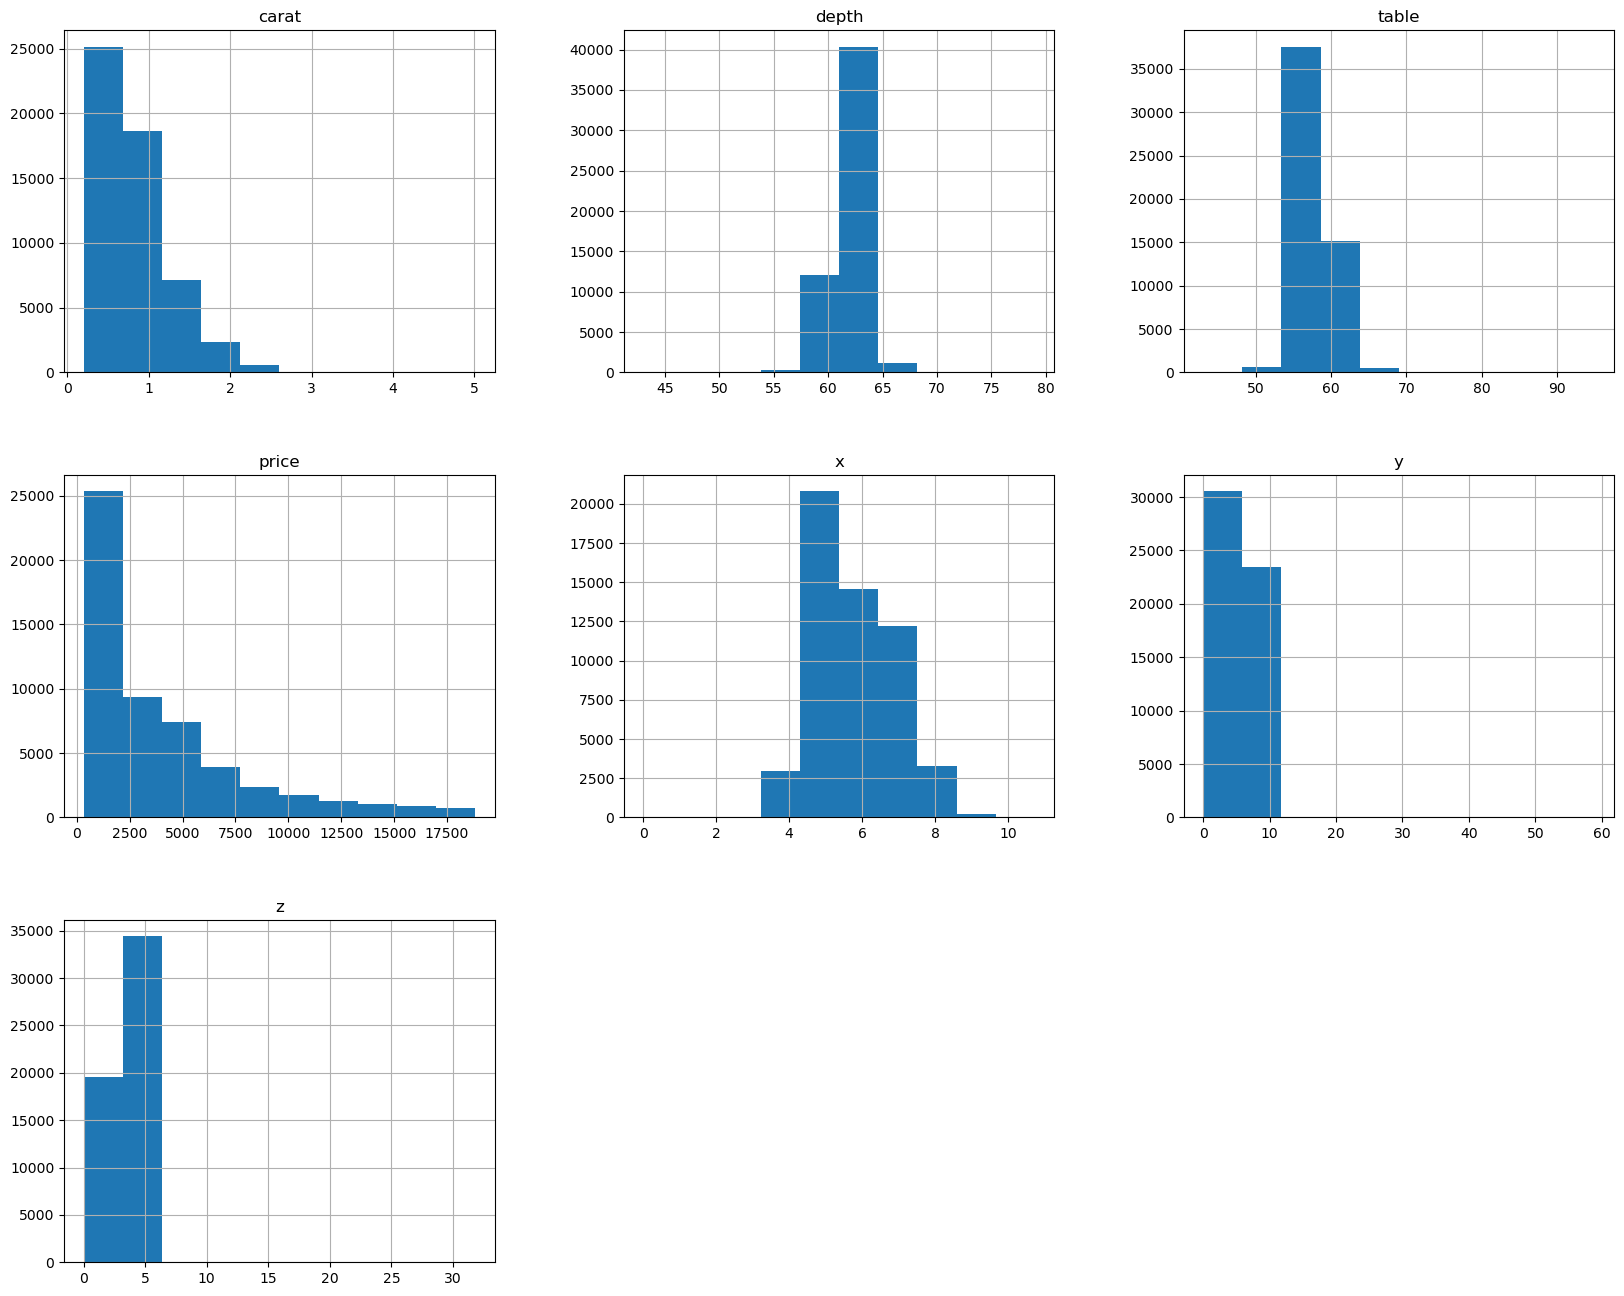

In [222]:
df.hist(figsize=(20, 16))
plt.show()

Most features (carat, price, x, y, z) are right-skewed, meaning there are more diamonds with smaller values. Depth and table are more normally distributed.

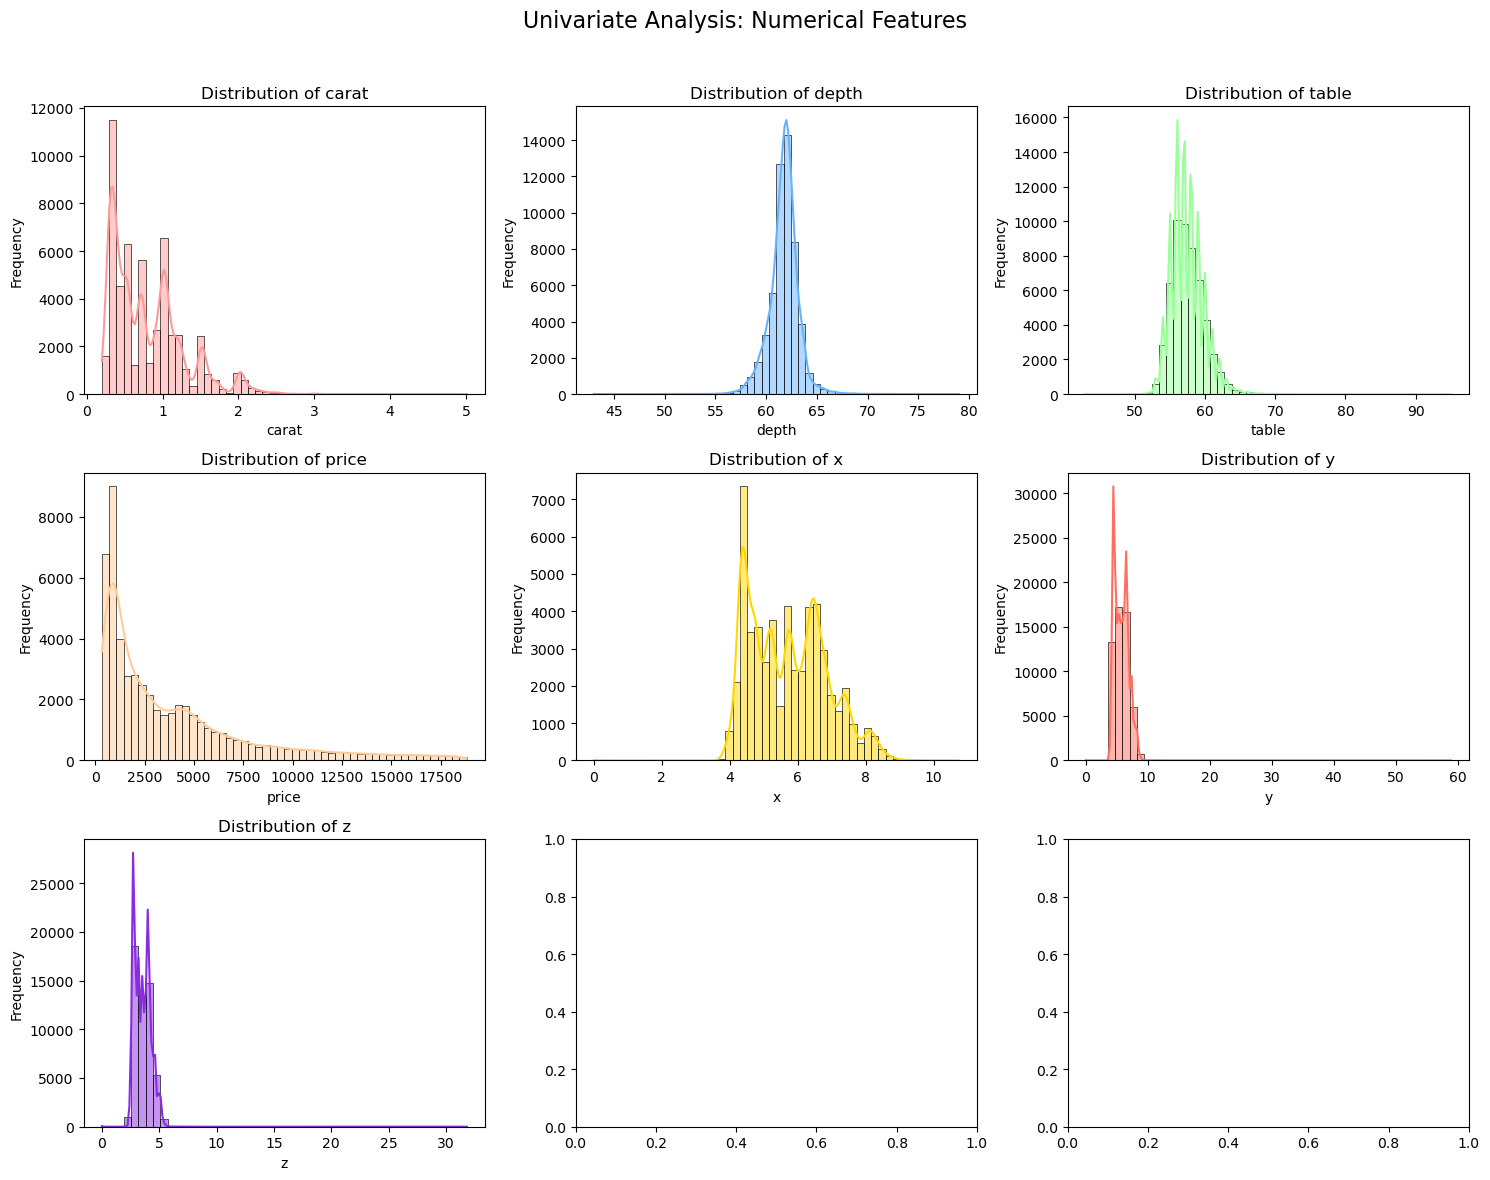

In [223]:

fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle("Univariate Analysis: Numerical Features", fontsize=16)


num_cols = ["carat", "depth", "table", "price", "x", "y", "z"]
colors = ["#FF9999", "#66B2FF", "#99FF99", "#FFCC99", "#FFD700", "#FF6F61", "#8A2BE2"]


for i, col in enumerate(num_cols):
    ax = axes[i // 3, i % 3] 
    sns.histplot(df[col], bins=50, kde=True, color=colors[i], ax=ax)
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


>1. Carat: Right-skewed distribution—most diamonds are smaller, with fewer large ones.
>2. Depth & Table: Mostly concentrated around 61-62 (depth) and 57-58 (table), but some extreme values exist.
>3. Price: Highly skewed—most diamonds are on the cheaper end, but a few very expensive ones increase the range.

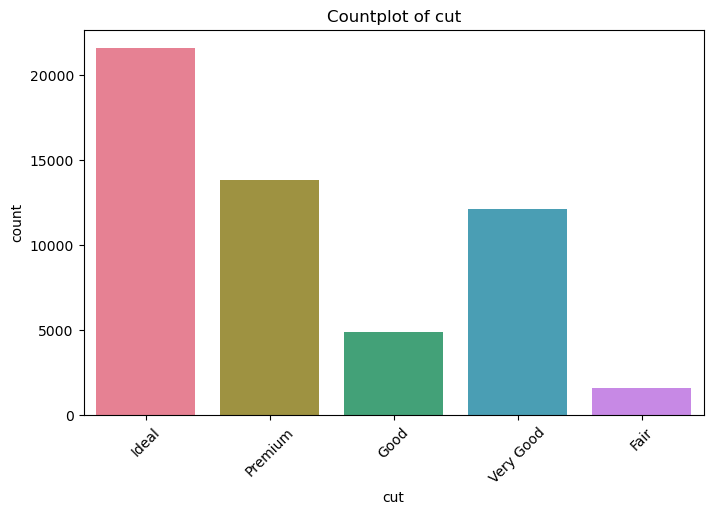

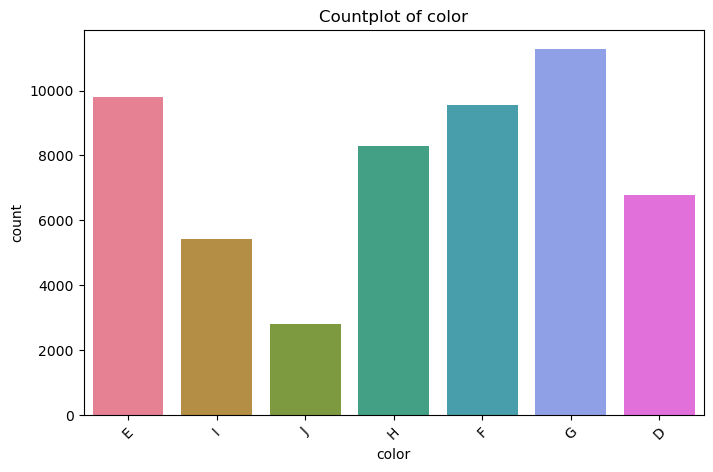

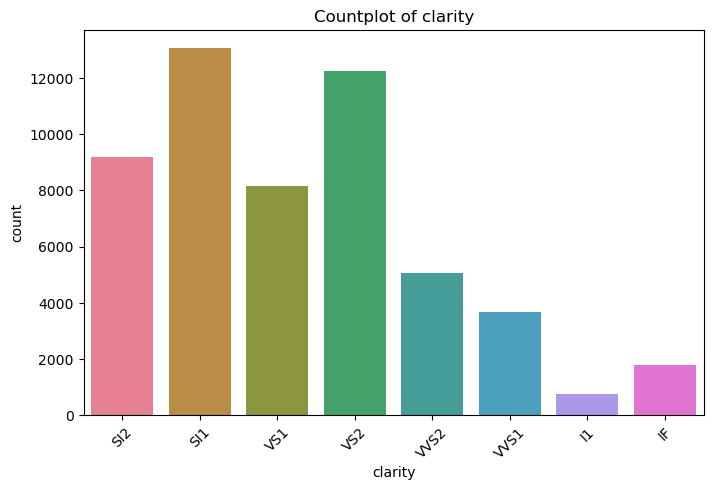

In [251]:
pcategorical_cols = ["cut", "color", "clarity"]

# Loop through categorical columns
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    
    # Dynamically set the color palette based on unique values in the column
    unique_values = df[col].nunique()
    palette = sns.color_palette("husl", unique_values)
    
    # Fix the warnings by setting `hue` to `x` and `legend=False`
    sns.countplot(x=col, data=df, hue=col, legend=False, palette=palette)
    
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.show()

## Insights from Categorical Variables:
1. Cut: Most diamonds have an "Ideal" or "Premium" cut, with fewer "Fair" and "Poor" diamonds.
2. Color: The most common color is "G", while "D" (best quality) and "J" (lowest quality) are less frequent.
3. Clarity: "SI1" and "VS2" are the most common clarity grades, meaning many diamonds have small inclusions.


In [252]:
def plot_pie_single(column):
    target_column = df[column].value_counts()
    plt.figure(figsize=(12, 8))
    fig1, ax1 = plt.subplots()
    ax1.pie(target_column, labels=target_column.index, autopct='%1.1f%%', shadow=None)
    ax1.axis('equal')
    plt.title(f"{column}_Value_Counts", fontweight="bold", size=14)
    plt.show()

In [253]:
def plot_bar_singRle(column):
    target_column = df[column].value_counts()
    plt.figure(figsize=(12, 8))
    target_column.plot(kind='bar', color=plt.cm.tab20(range(len(target_column))))
    plt.title(f"{column}_Value_Counts", fontweight="bold", size=14)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

## Plotting All Data Features

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


<Figure size 1200x800 with 0 Axes>

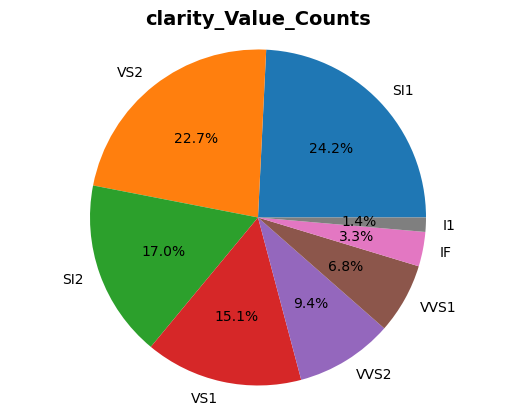

In [255]:
plot_pie_single('clarity')

<Figure size 1200x800 with 0 Axes>

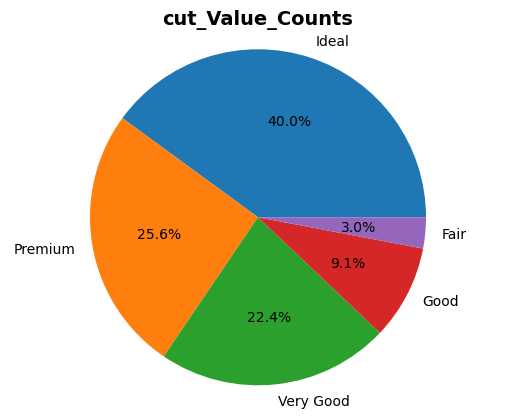

In [256]:
plot_pie_single('cut')

<Figure size 1200x800 with 0 Axes>

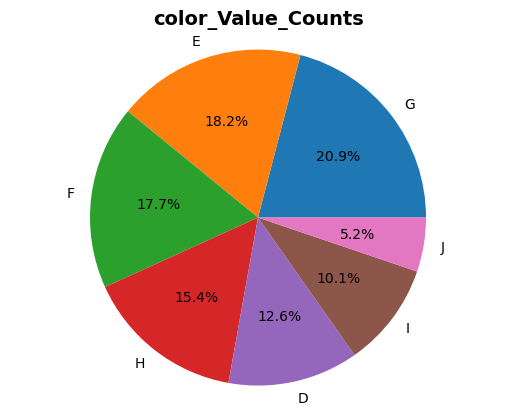

In [257]:
plot_pie_single('color')

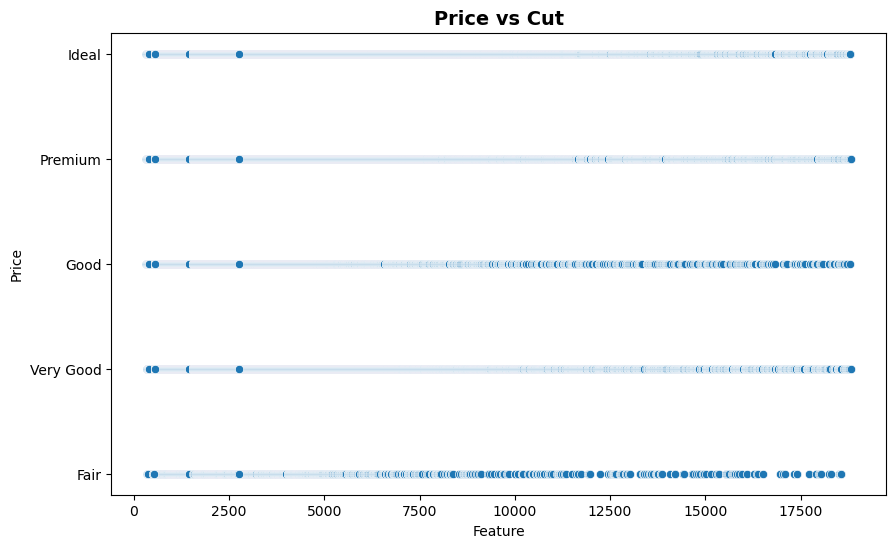

In [258]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="price", y="cut", data=df)
plt.title("Price vs Cut", fontweight="bold", size=14)
plt.xlabel("Feature")
plt.ylabel("Price")
plt.show()

Prices are widely distributed across all cut categories, with no extreme outliers based on cut quality.

In [259]:
grouped_cut_colour = df.groupby(["cut","color"])["price"].mean()
grouped_cut_colour

cut        color
Fair       D        4291.061350
           E        3682.312500
           F        3827.003205
           G        4239.254777
           H        5135.683168
           I        4685.445714
           J        4975.655462
Good       D        3405.382175
           E        3423.644159
           F        3495.750275
           G        4123.482204
           H        4276.254986
           I        5078.532567
           J        4574.172638
Ideal      D        2629.094566
           E        2597.550090
           F        3374.939362
           G        3720.706388
           H        3889.334831
           I        4451.970377
           J        4918.186384
Premium    D        3631.292576
           E        3538.914420
           F        4324.890176
           G        4500.742134
           H        5216.706780
           I        5946.180672
           J        6294.591584
Very Good  D        3470.467284
           E        3214.652083
           F        377

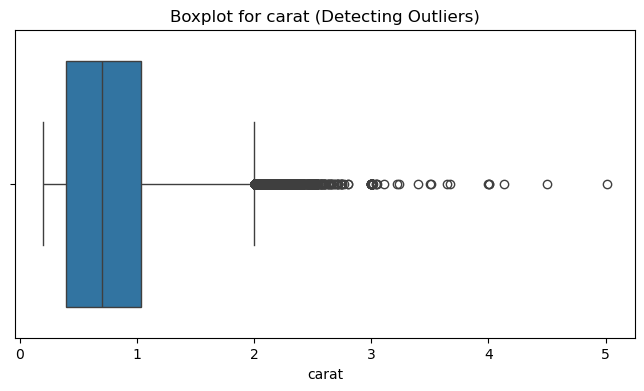

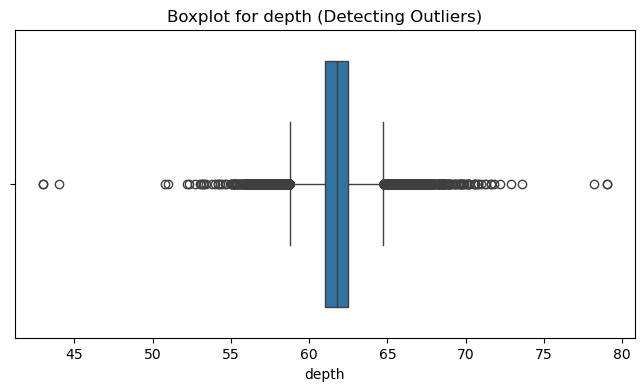

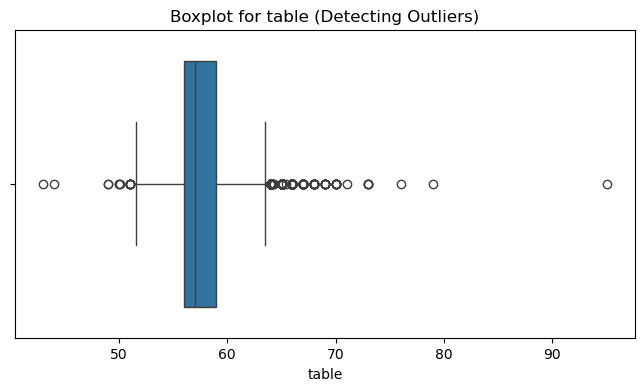

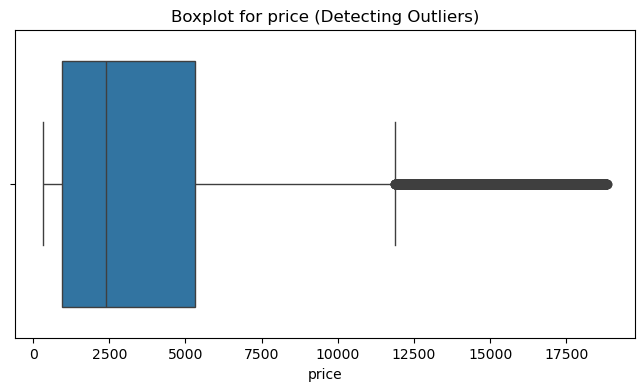

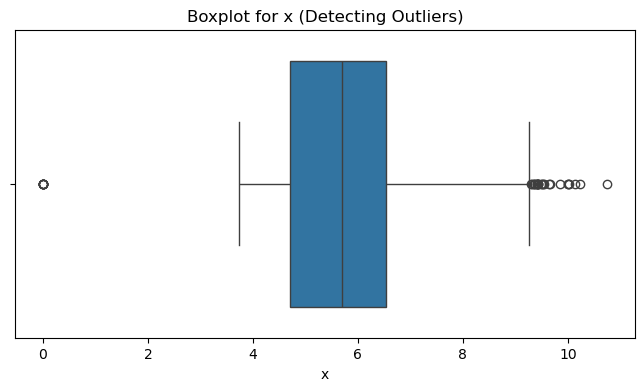

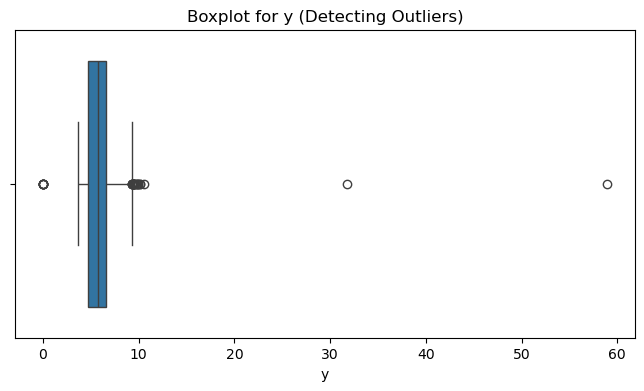

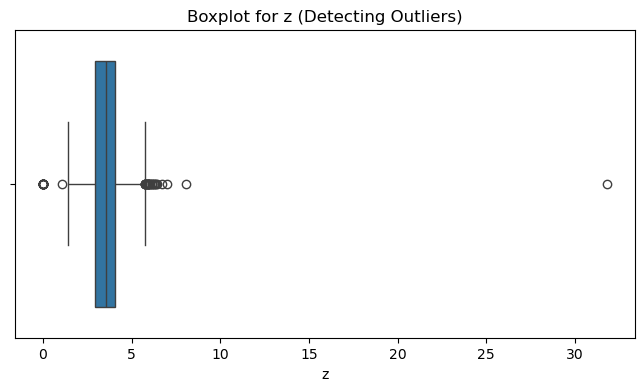

In [260]:
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col} (Detecting Outliers)')
    plt.show()


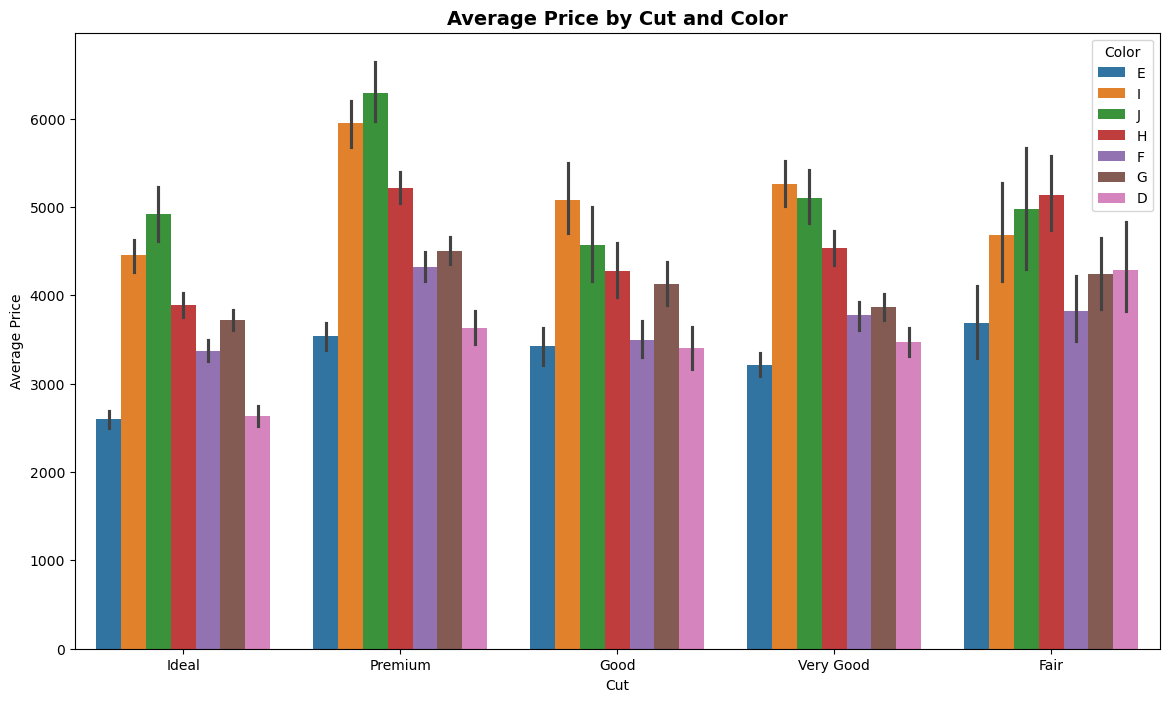

In [261]:
plt.figure(figsize=(14, 8))
sns.barplot(x='cut', y='price', hue='color', data=df)
plt.title('Average Price by Cut and Color', fontweight="bold", size=14)
plt.xlabel('Cut')
plt.ylabel('Average Price')
plt.legend(title='Color')
plt.show()

1. Premium and Ideal cuts have higher average prices, with Premium being the most expensive on average.
2. Color impacts price variation, with diamonds of color J and I generally having higher average prices.
3. Fair and Good cuts tend to have lower prices compared to higher-quality cuts like Premium and Ideal.

<Figure size 1200x600 with 0 Axes>

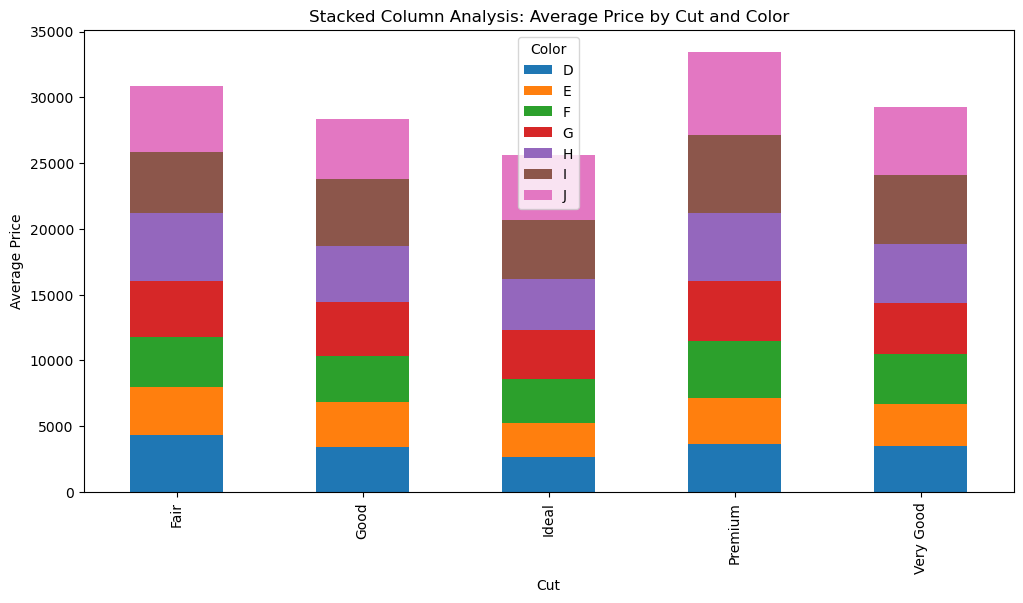

In [262]:
plt.figure(figsize=(12, 6))
stacked_data = df.groupby(['cut', 'color'])['price'].mean().unstack()
stacked_data.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Stacked Column Analysis: Average Price by Cut and Color")
plt.xlabel("Cut")
plt.ylabel("Average Price")
plt.legend(title="Color")
plt.show()

Prices vary significantly by color and cut, with "Premium" cut diamonds tending to have the highest prices, and color J showing the highest overall price trends.

In [263]:
numerical_summary = df[numerical_cols].describe()
numerical_modes = df[numerical_cols].mode().iloc[0]
missing_values = df[numerical_cols].isnull().sum()
zero_values = (df[numerical_cols] == 0).sum()
categorical_summary = df[categorical_cols].describe()
category_counts = {col: df[col].value_counts() for col in categorical_cols}
print("Numerical Summary:\n", numerical_summary)
print("\nMode for Numerical Columns:\n", numerical_modes)
print("\nMissing Values in Numerical Columns:\n", missing_values)
print("\nZero Values in Numerical Columns:\n", zero_values)
print("\nCategorical Summary:\n", categorical_summary)
for col, counts in category_counts.items():
    print(f"\nValue Counts for {col}:\n", counts)



Numerical Summary:
               carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%        6.540

# BIVARIATE ANALYSIS

In [264]:
# Chi-square test
from scipy import stats
from scipy.stats import chi2_contingency
# Chi-square test for categorical columns
for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 != col2:
            contingency_table = pd.crosstab(df[col1], df[col2])
            chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
            print(f"Chi-square test between {col1} and {col2}: chi2={chi2}, p-value={p}, degrees of freedom={dof}")

Chi-square test between cut and color: chi2=310.31790052115434, p-value=1.394512091985105e-51, degrees of freedom=24
Chi-square test between cut and clarity: chi2=4391.398067200364, p-value=0.0, degrees of freedom=28
Chi-square test between color and cut: chi2=310.31790052115423, p-value=1.3945120919851853e-51, degrees of freedom=24
Chi-square test between color and clarity: chi2=2047.0791639481317, p-value=0.0, degrees of freedom=42
Chi-square test between clarity and cut: chi2=4391.398067200364, p-value=0.0, degrees of freedom=28
Chi-square test between clarity and color: chi2=2047.0791639481313, p-value=0.0, degrees of freedom=42


In [265]:
# Z-test and t-test for numerical columns
for col1 in numerical_cols:
    for col2 in numerical_cols:
        if col1 != col2:
            z_stat, p_value_z = stats.ranksums(df[col1], df[col2])
            t_stat, p_value_t = stats.ttest_ind(df[col1], df[col2], equal_var=False)
            
            print(f"Z-test between {col1} and {col2}: Z-Stat={z_stat}, P-Value={p_value_z}")
            print(f"T-test between {col1} and {col2}: T-Stat={t_stat}, P-Value={p_value_t}")
            print("\n")

Z-test between carat and depth: Z-Stat=-284.4455132480597, P-Value=0.0
T-test between carat and depth: T-Stat=-9381.007316370647, P-Value=0.0


Z-test between carat and table: Z-Stat=-284.4455132480597, P-Value=0.0
T-test between carat and table: T-Stat=-5760.887726925135, P-Value=0.0


Z-test between carat and price: Z-Stat=-284.4455132480597, P-Value=0.0
T-test between carat and price: T-Stat=-228.90604654734673, P-Value=0.0


Z-test between carat and x: Z-Stat=-284.3552429309555, P-Value=0.0
T-test between carat and x: T-Stat=-940.8279305298822, P-Value=0.0


Z-test between carat and y: Z-Stat=-284.36590806028653, P-Value=0.0
T-test between carat and y: T-Stat=-927.1627545296548, P-Value=0.0


Z-test between carat and z: Z-Stat=-284.0086268631598, P-Value=0.0
T-test between carat and z: T-Stat=-748.7788827830448, P-Value=0.0


Z-test between depth and carat: Z-Stat=284.4455132480597, P-Value=0.0
T-test between depth and carat: T-Stat=9381.007316370647, P-Value=0.0


Z-test between d

In [266]:
# Crosstab for categorical variables
for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 != col2:
            cross_tab = pd.crosstab(df[col1], df[col2])
            print(f"Crosstab between {col1} and {col2}:\n{cross_tab}\n")

Crosstab between cut and color:
color         D     E     F     G     H     I    J
cut                                               
Fair        163   224   312   314   303   175  119
Good        662   933   909   871   702   522  307
Ideal      2834  3903  3826  4884  3115  2093  896
Premium    1603  2337  2331  2924  2360  1428  808
Very Good  1513  2400  2164  2299  1824  1204  678

Crosstab between cut and clarity:
clarity     I1    IF   SI1   SI2   VS1   VS2  VVS1  VVS2
cut                                                     
Fair       210     9   408   466   170   261    17    69
Good        96    71  1560  1081   648   978   186   286
Ideal      146  1212  4282  2598  3589  5071  2047  2606
Premium    205   230  3575  2949  1989  3357   616   870
Very Good   84   268  3240  2100  1775  2591   789  1235

Crosstab between color and cut:
cut    Fair  Good  Ideal  Premium  Very Good
color                                       
D       163   662   2834     1603       1513
E       2

In [267]:
# ANOVA test for numerical columns grouped by categorical columns
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        groups = [df[num_col][df[cat_col] == category] for category in df[cat_col].unique()]
        anova_stat, p_value_anova = stats.f_oneway(*groups)
        print(f"ANOVA test between {num_col} and {cat_col}: F-statistic={anova_stat}, p-value={p_value_anova}")
        print("\n")

ANOVA test between carat and cut: F-statistic=495.69425927416324, p-value=0.0


ANOVA test between depth and cut: F-statistic=1897.4085865319596, p-value=0.0


ANOVA test between table and cut: F-statistic=6367.179433767924, p-value=0.0


ANOVA test between price and cut: F-statistic=175.68871735080606, p-value=8.42830730759452e-150


ANOVA test between x and cut: F-statistic=489.3942696199593, p-value=0.0


ANOVA test between y and cut: F-statistic=395.7202028355892, p-value=0.0


ANOVA test between z and cut: F-statistic=489.3982084197057, p-value=0.0


ANOVA test between carat and color: F-statistic=927.6747530481588, p-value=0.0


ANOVA test between depth and color: F-statistic=23.582426227314226, p-value=5.2907629599120475e-28


ANOVA test between table and color: F-statistic=27.427086982932323, p-value=7.205059975265356e-33


ANOVA test between price and color: F-statistic=290.20588071108847, p-value=0.0


ANOVA test between x and color: F-statistic=779.0667601070552, p-value=0.0

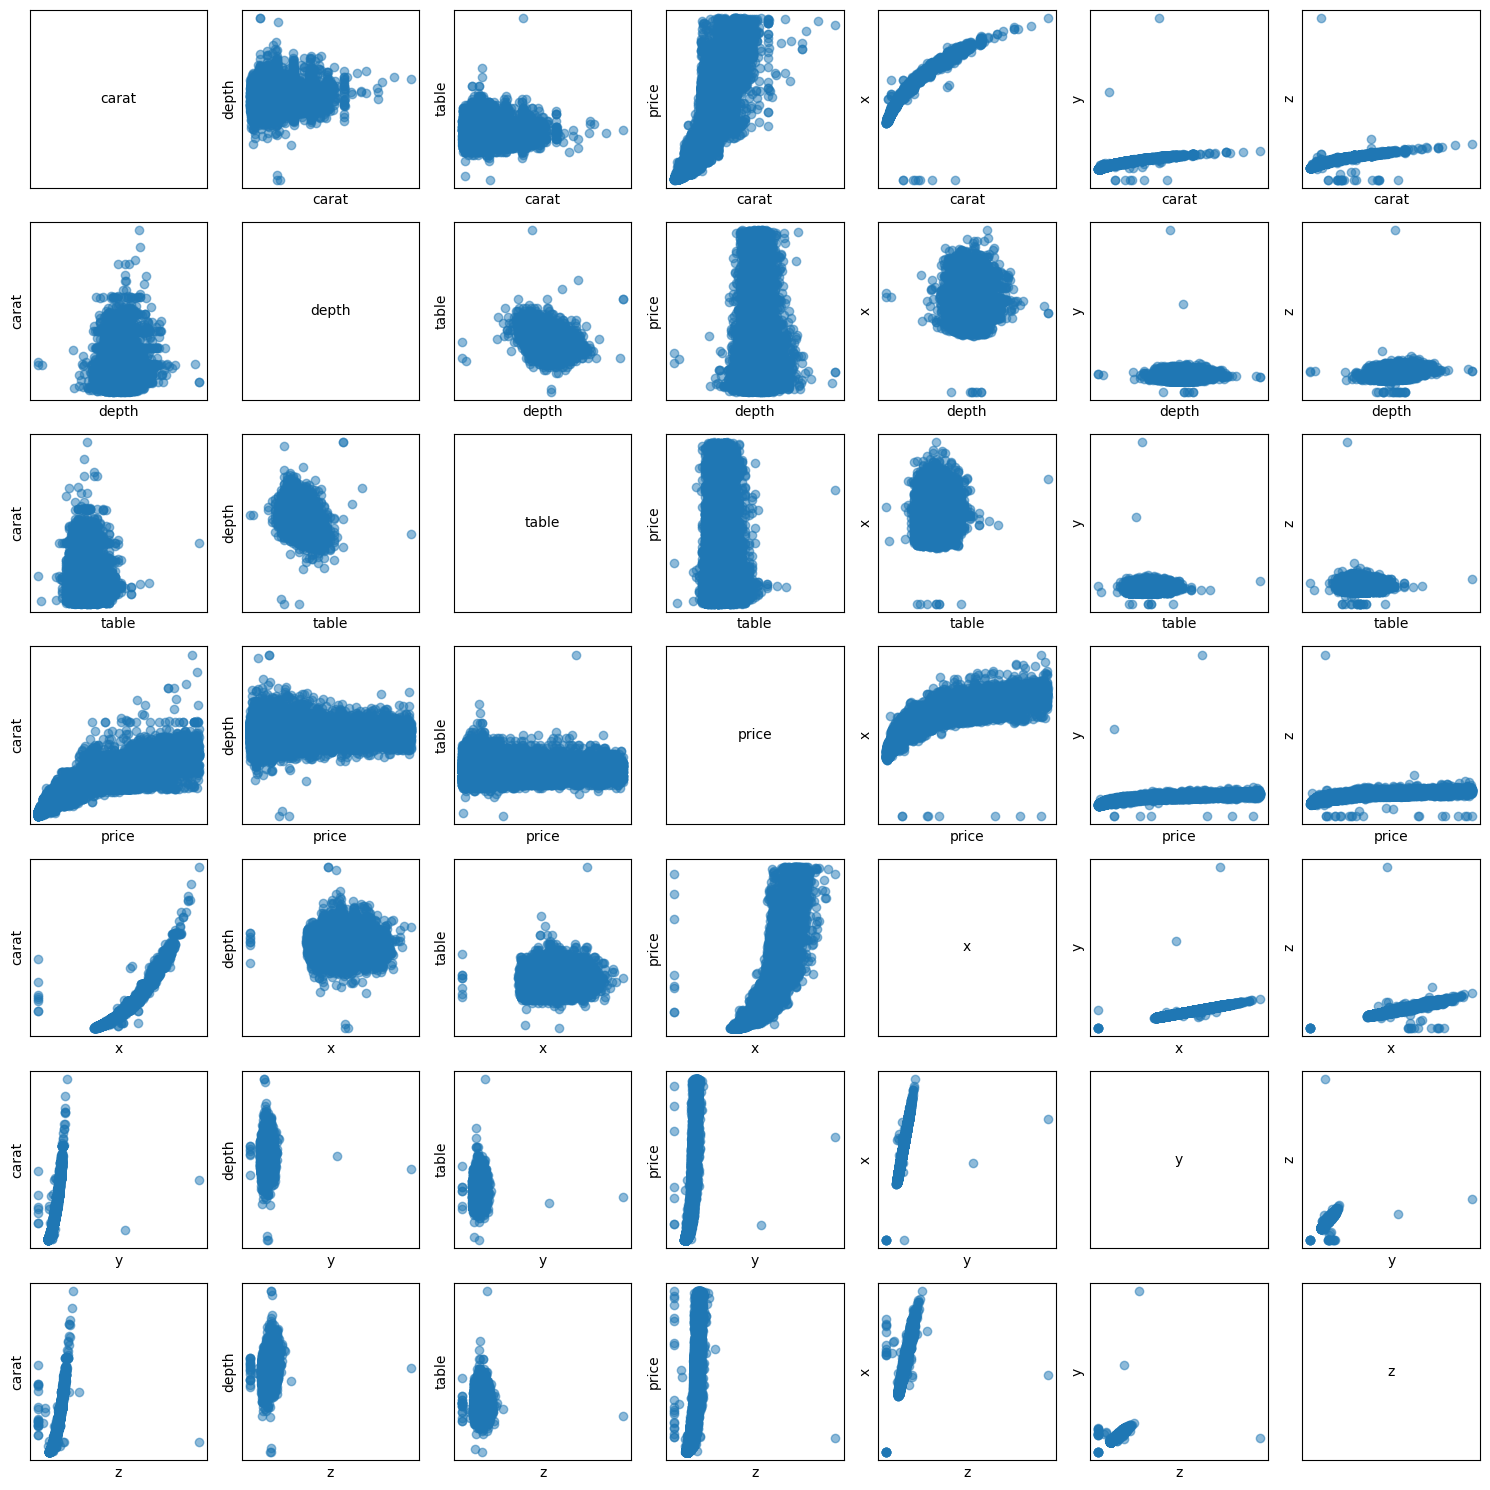

In [268]:
# Numerical vs Numerical analysis through subplots
num_cols_len = len(numerical_cols)
fig, axes = plt.subplots(num_cols_len, num_cols_len, figsize=(15, 15))
for i, col1 in enumerate(numerical_cols):
    for j, col2 in enumerate(numerical_cols):
        if i != j:
            axes[i, j].scatter(df[col1], df[col2], alpha=0.5)
            axes[i, j].set_xlabel(col1)
            axes[i, j].set_ylabel(col2)
        else:
            axes[i, j].text(0.5, 0.5, col1, ha='center', va='center', fontsize=10)
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])
plt.tight_layout()
plt.show()

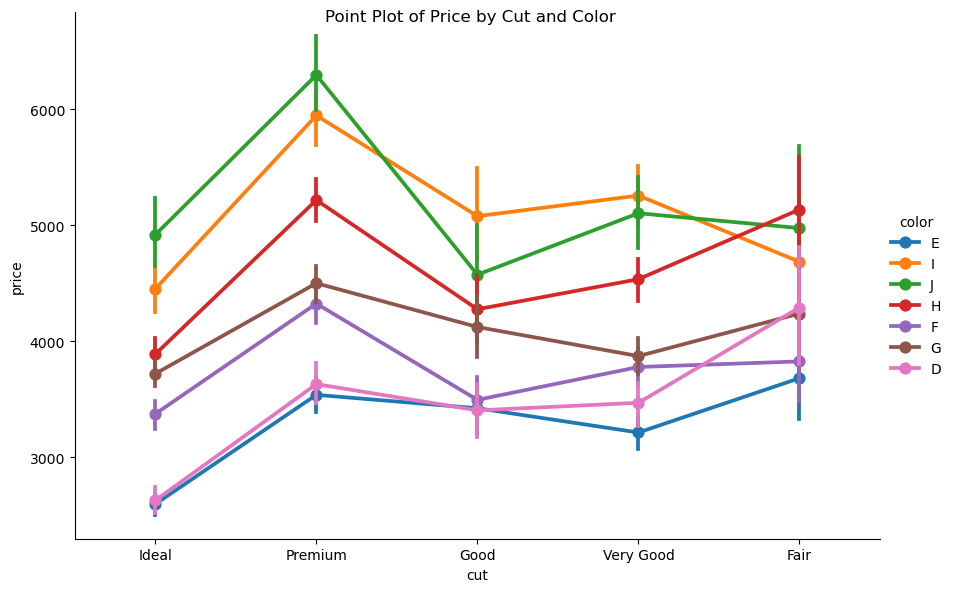

In [269]:
g = sns.catplot(x="cut", y="price", hue="color", kind="point", data=df, height=6, aspect=1.5)
g.fig.suptitle("Point Plot of Price by Cut and Color")
plt.show()


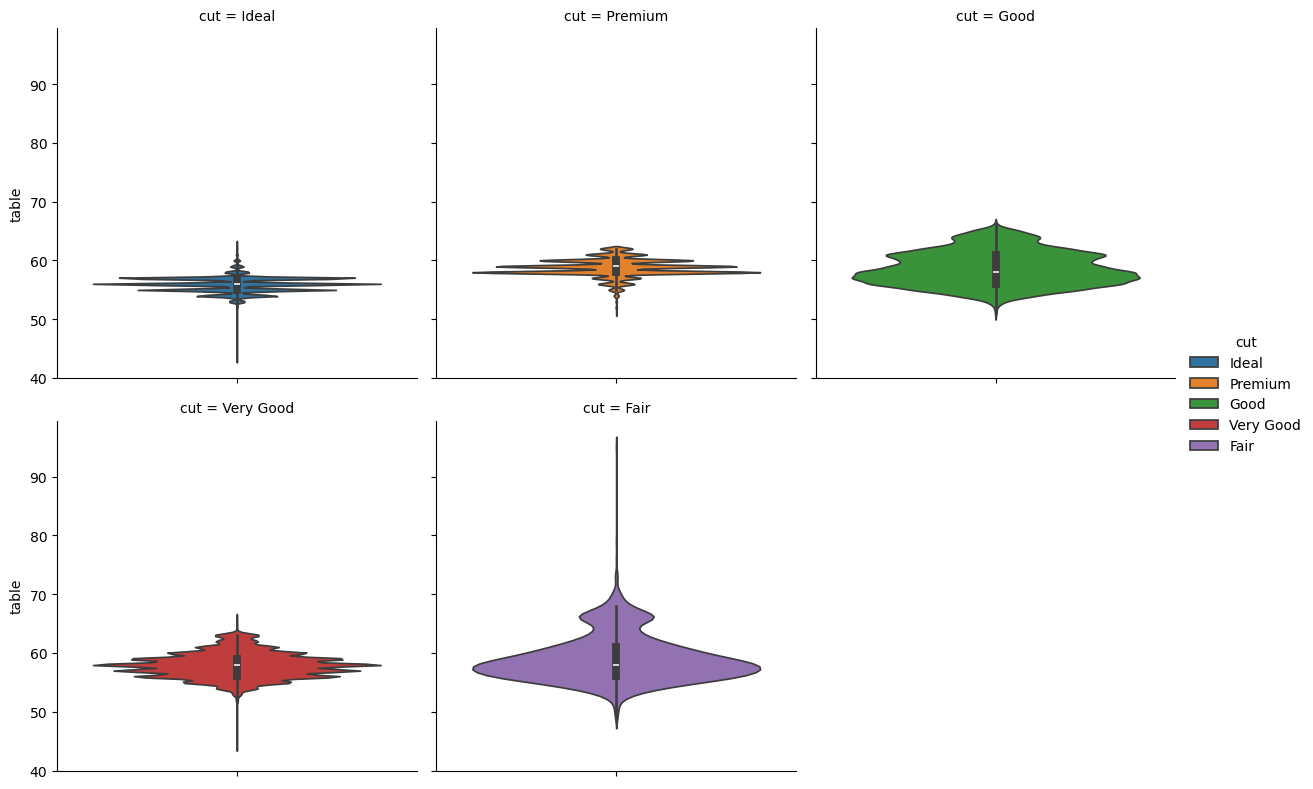

In [270]:
sns.catplot(y='table', kind='violin', hue='cut', data=df, col='cut', col_wrap=3, height=4, aspect=1)
plt.show()

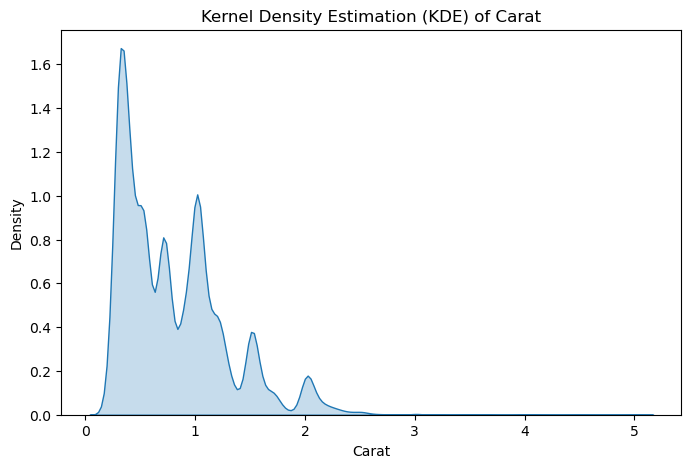

In [271]:
plt.figure(figsize=(8, 5))  # Adjust figure size
sns.kdeplot(data=df["carat"], fill=True)
plt.title("Kernel Density Estimation (KDE) of Carat")
plt.xlabel("Carat")
plt.ylabel("Density")
plt.show()

# Categorical vs Numerical Analysis

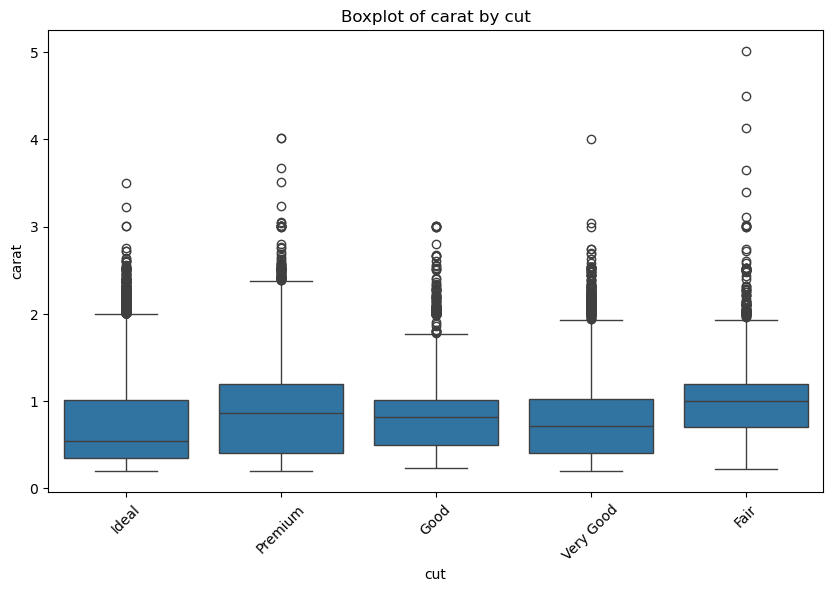

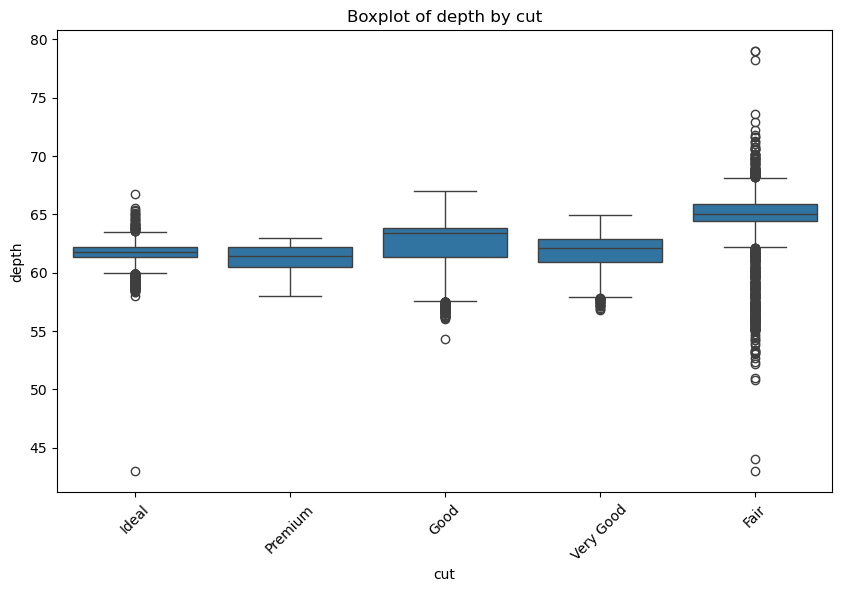

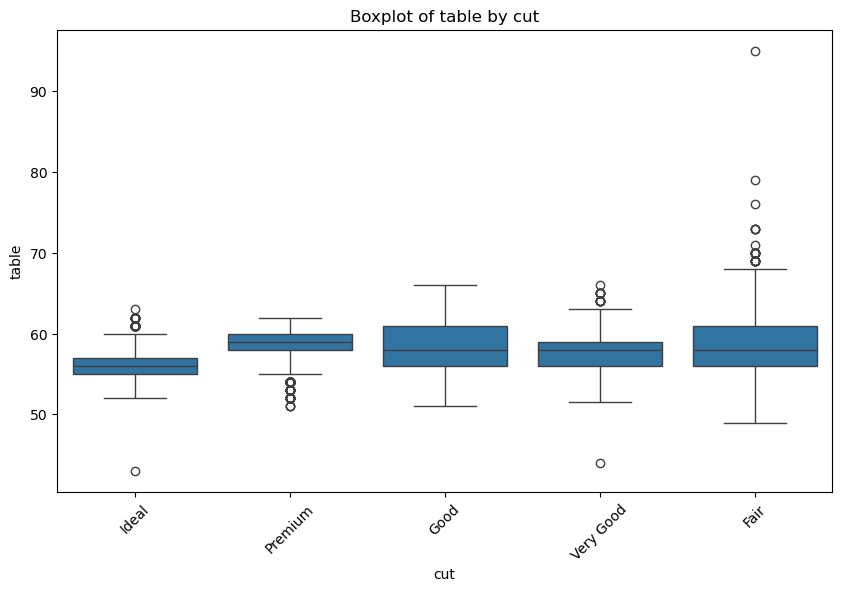

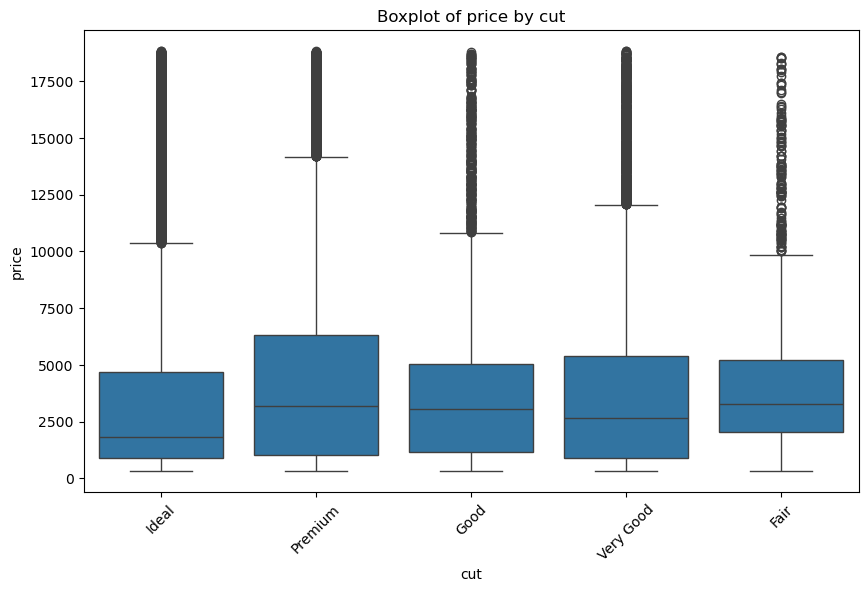

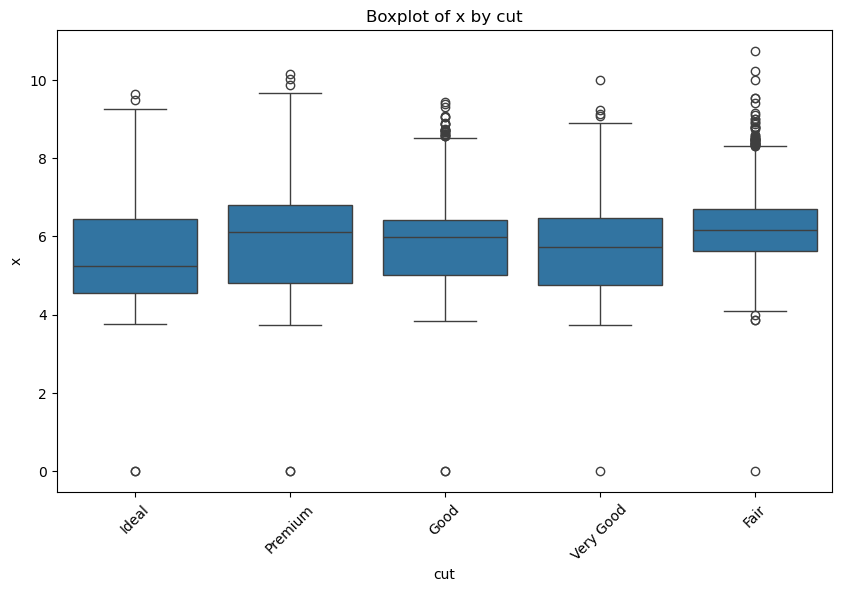

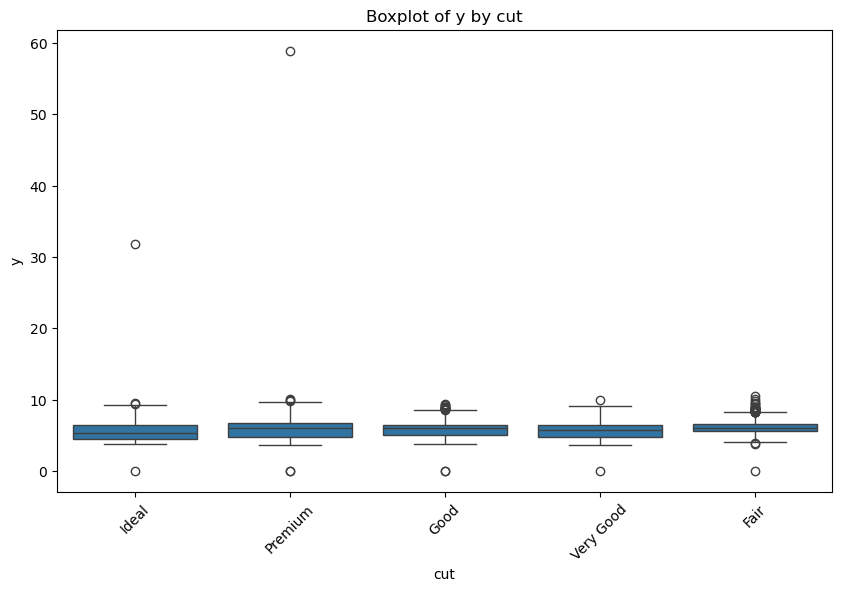

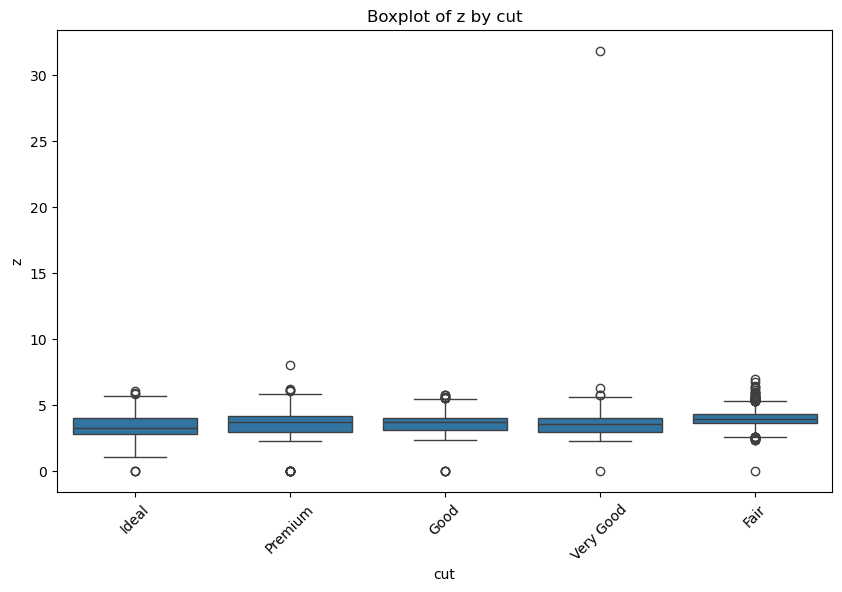

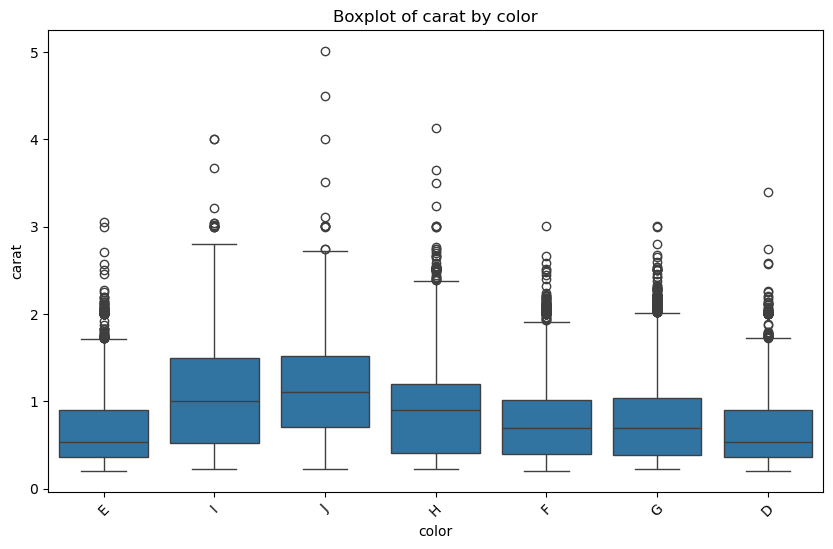

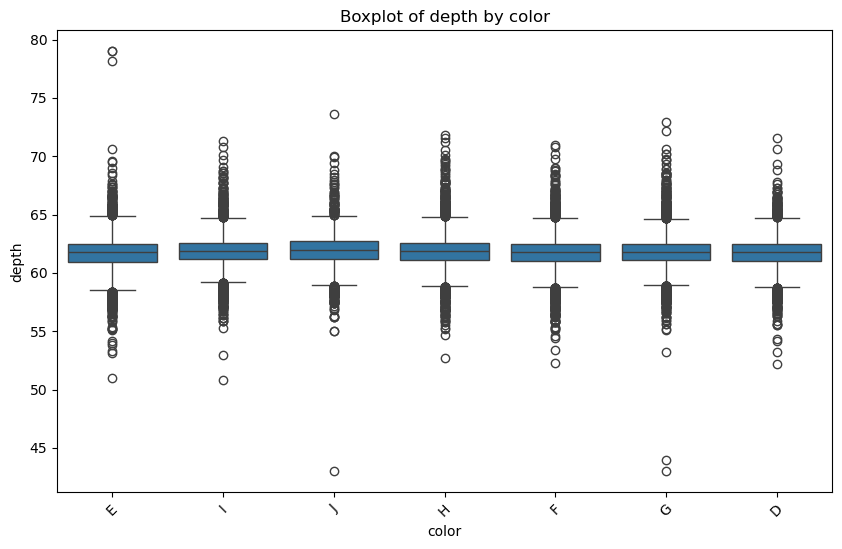

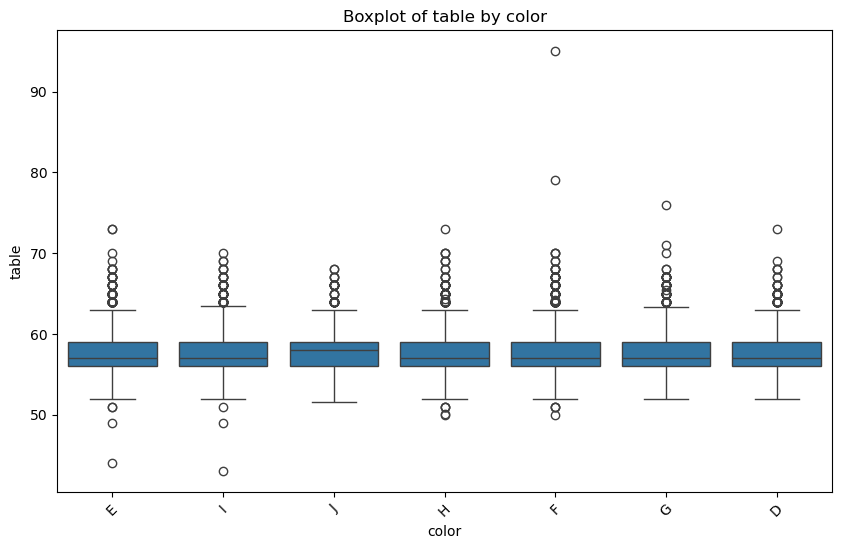

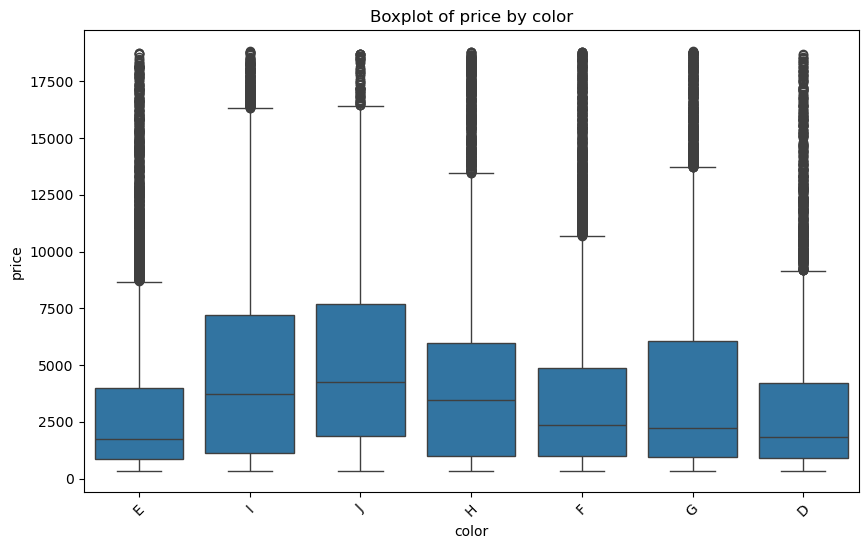

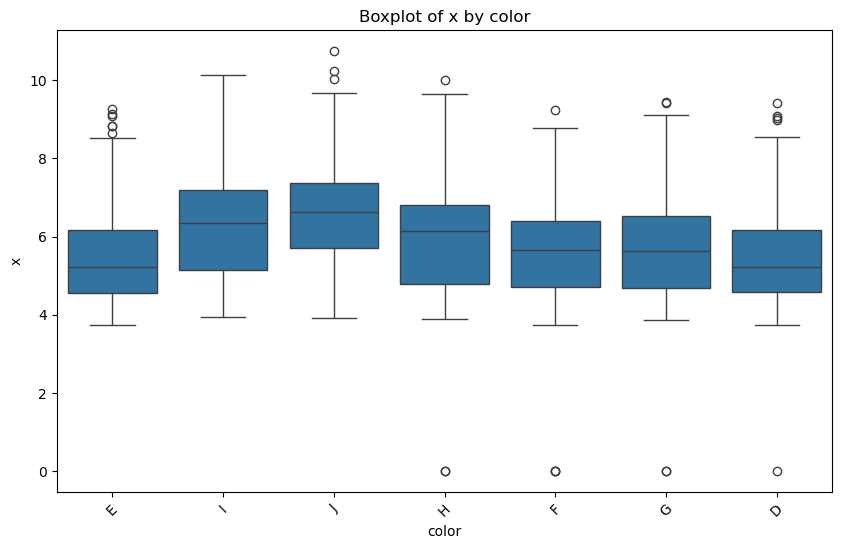

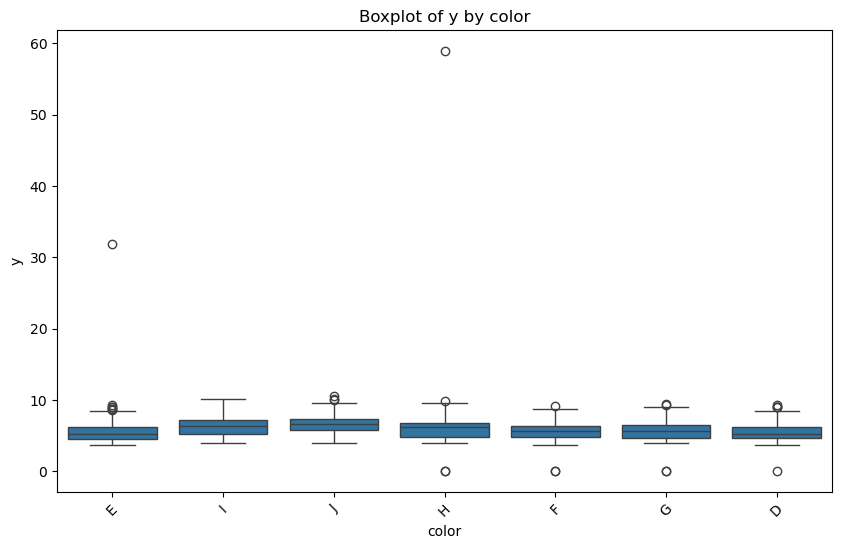

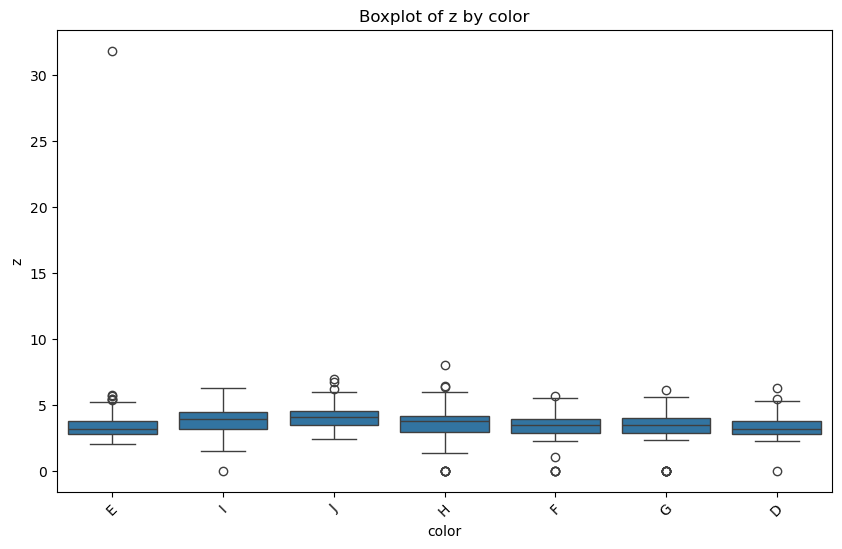

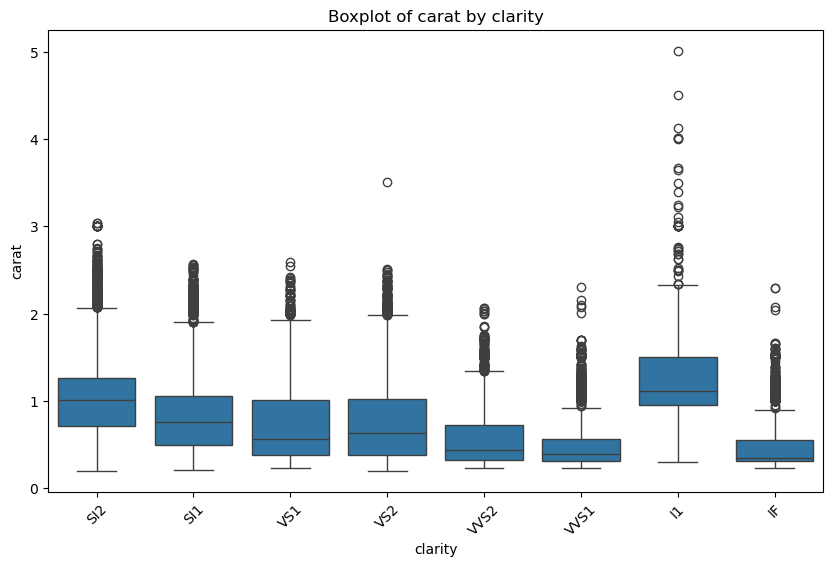

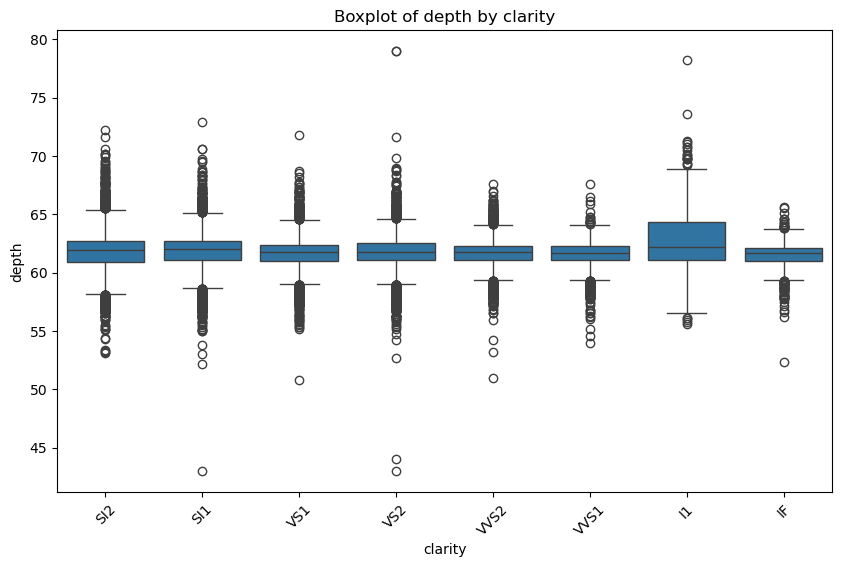

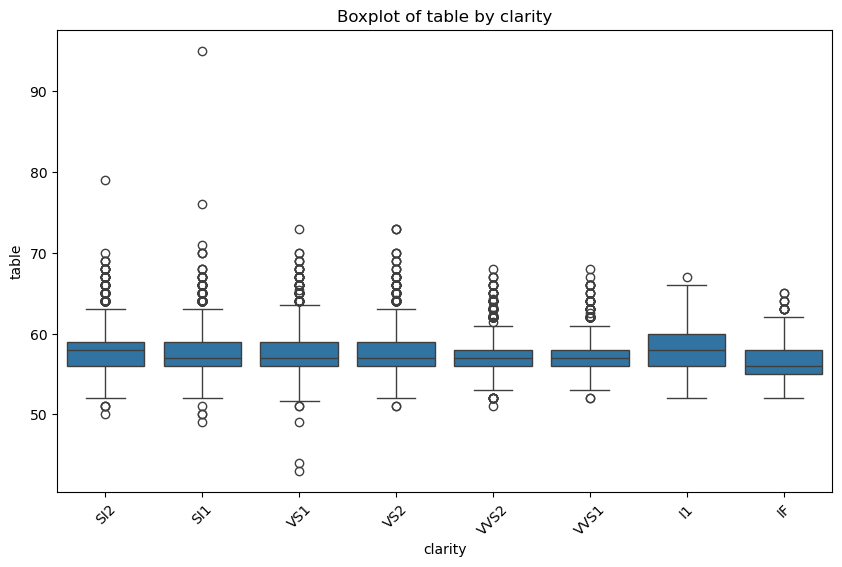

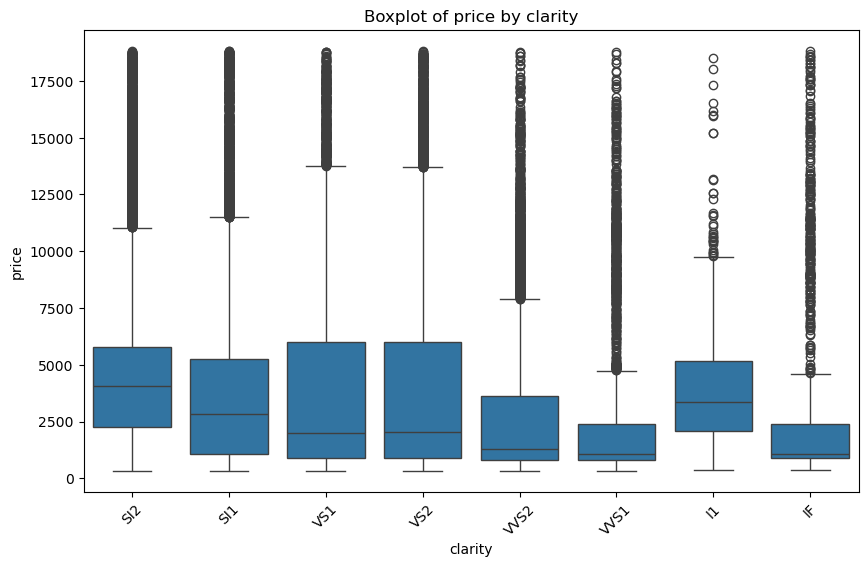

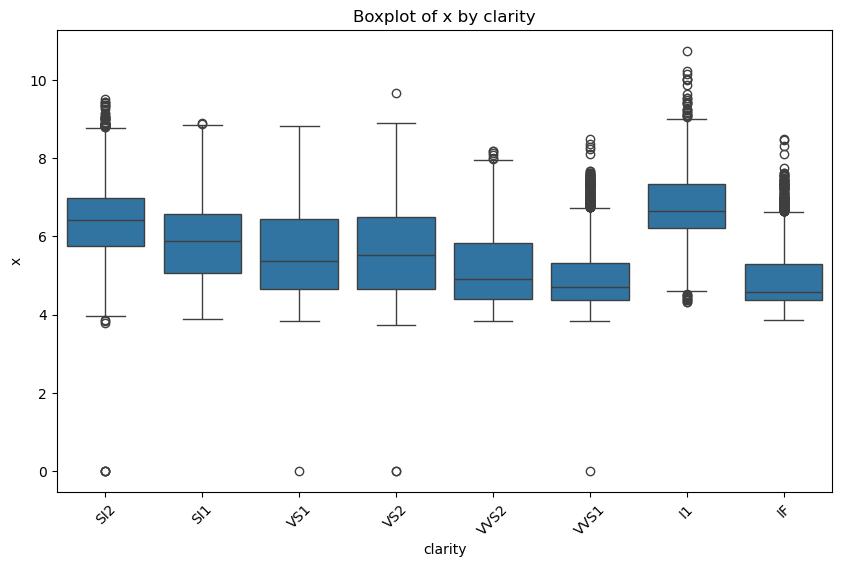

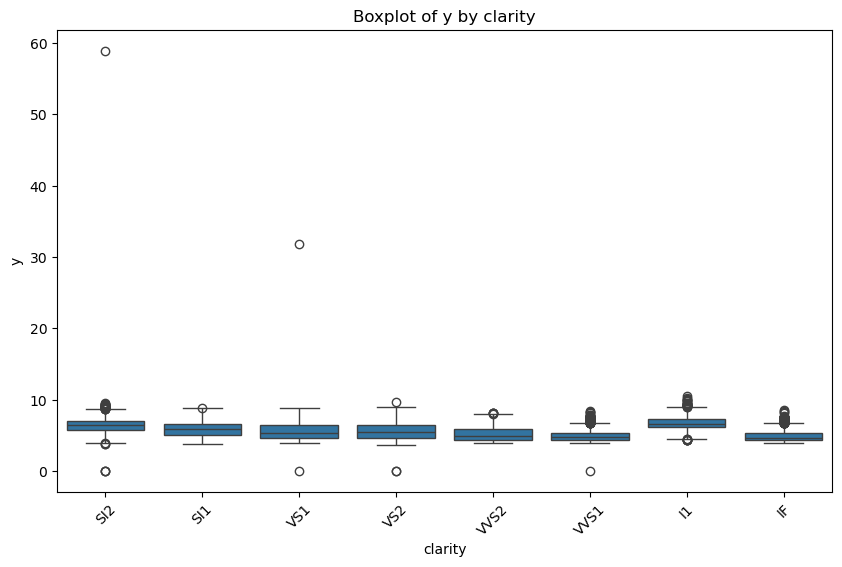

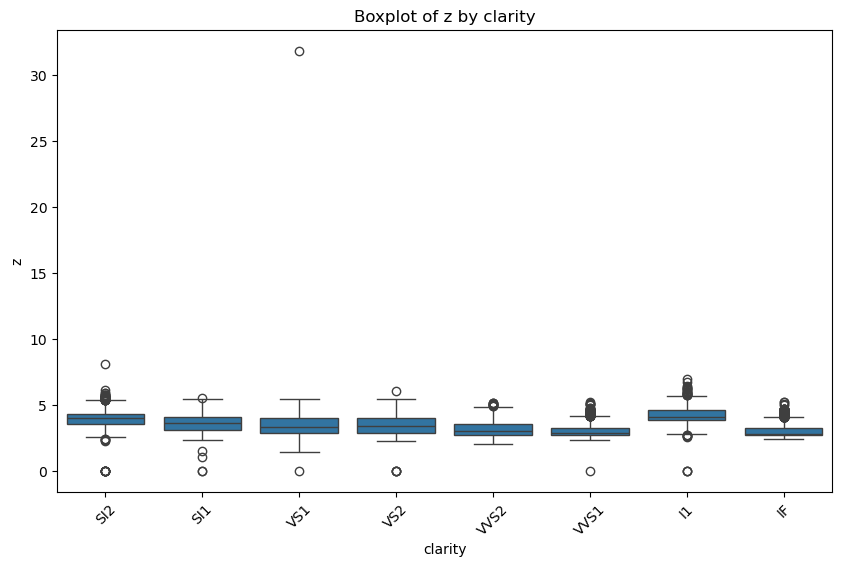

In [272]:
for cat_col in categorical_cols:
    for num_col in numerical_cols:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[cat_col], y=df[num_col])
        plt.title(f'Boxplot of {num_col} by {cat_col}')
        plt.xticks(rotation=45)
        plt.show()

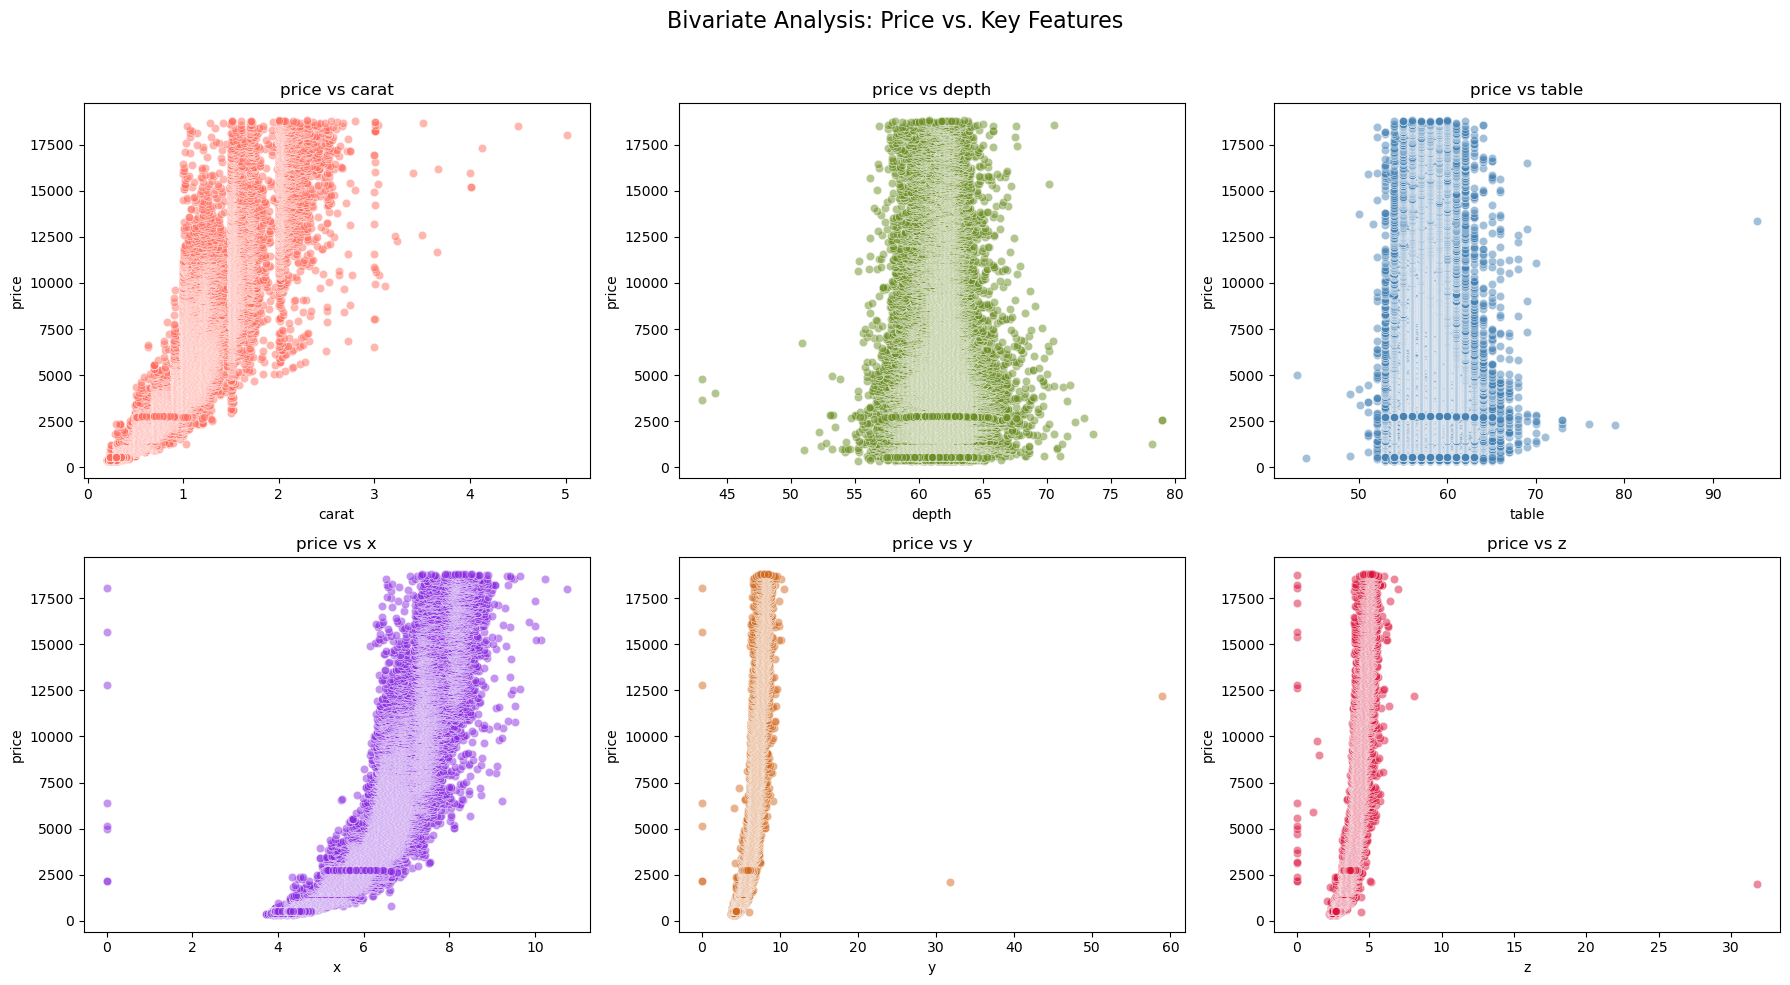

In [273]:

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle("Bivariate Analysis: Price vs. Key Features", fontsize=16)


relations = [("carat", "price"), ("depth", "price"), ("table", "price"), 
             ("x", "price"), ("y", "price"), ("z", "price")]


scatter_colors = ["#FF6F61", "#6B8E23", "#4682B4", "#8A2BE2", "#D2691E", "#DC143C"]


for i, (x_col, y_col) in enumerate(relations):
    ax = axes[i // 3, i % 3]
    sns.scatterplot(x=df[x_col], y=df[y_col], alpha=0.5, color=scatter_colors[i], ax=ax)
    ax.set_title(f"{y_col} vs {x_col}")
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()


**Bivariate Analysis Insights:**
1. Carat vs. Price: Strong positive correlation—larger carat values significantly increase the price.
2. Depth vs. Price: No clear pattern—depth does not strongly impact price.
3. Table vs. Price: Weak relationship—suggesting table width is not a major determinant of price.

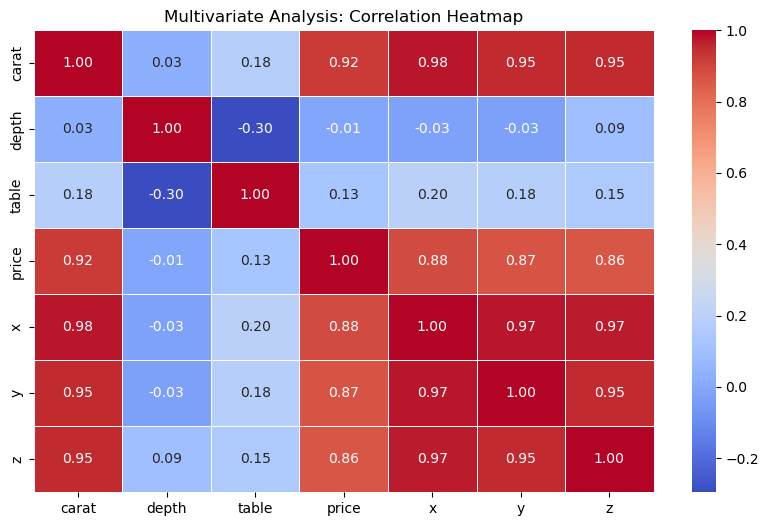

In [274]:

numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Multivariate Analysis: Correlation Heatmap")
plt.show()


**Strong Positive Correlation:**

1. carat has a high positive correlation with price (0.92), meaning larger diamonds tend to be more expensive.
2. x, y, and z (dimensions) are highly correlated with carat, which is expected as larger diamonds have bigger dimensions.
3. x, y, and z are strongly correlated with each other (~0.97), showing that diamonds tend to be proportionally shaped.
   
**Weak or Negative Correlation:**

1. depth has a weak correlation with most variables, and even a slight negative correlation with table (-0.30), suggesting that depth and table percentage do not strongly influence other numerical features.
2. table shows a weak correlation with price (0.13), indicating that the table percentage has little effect on diamond pricing.

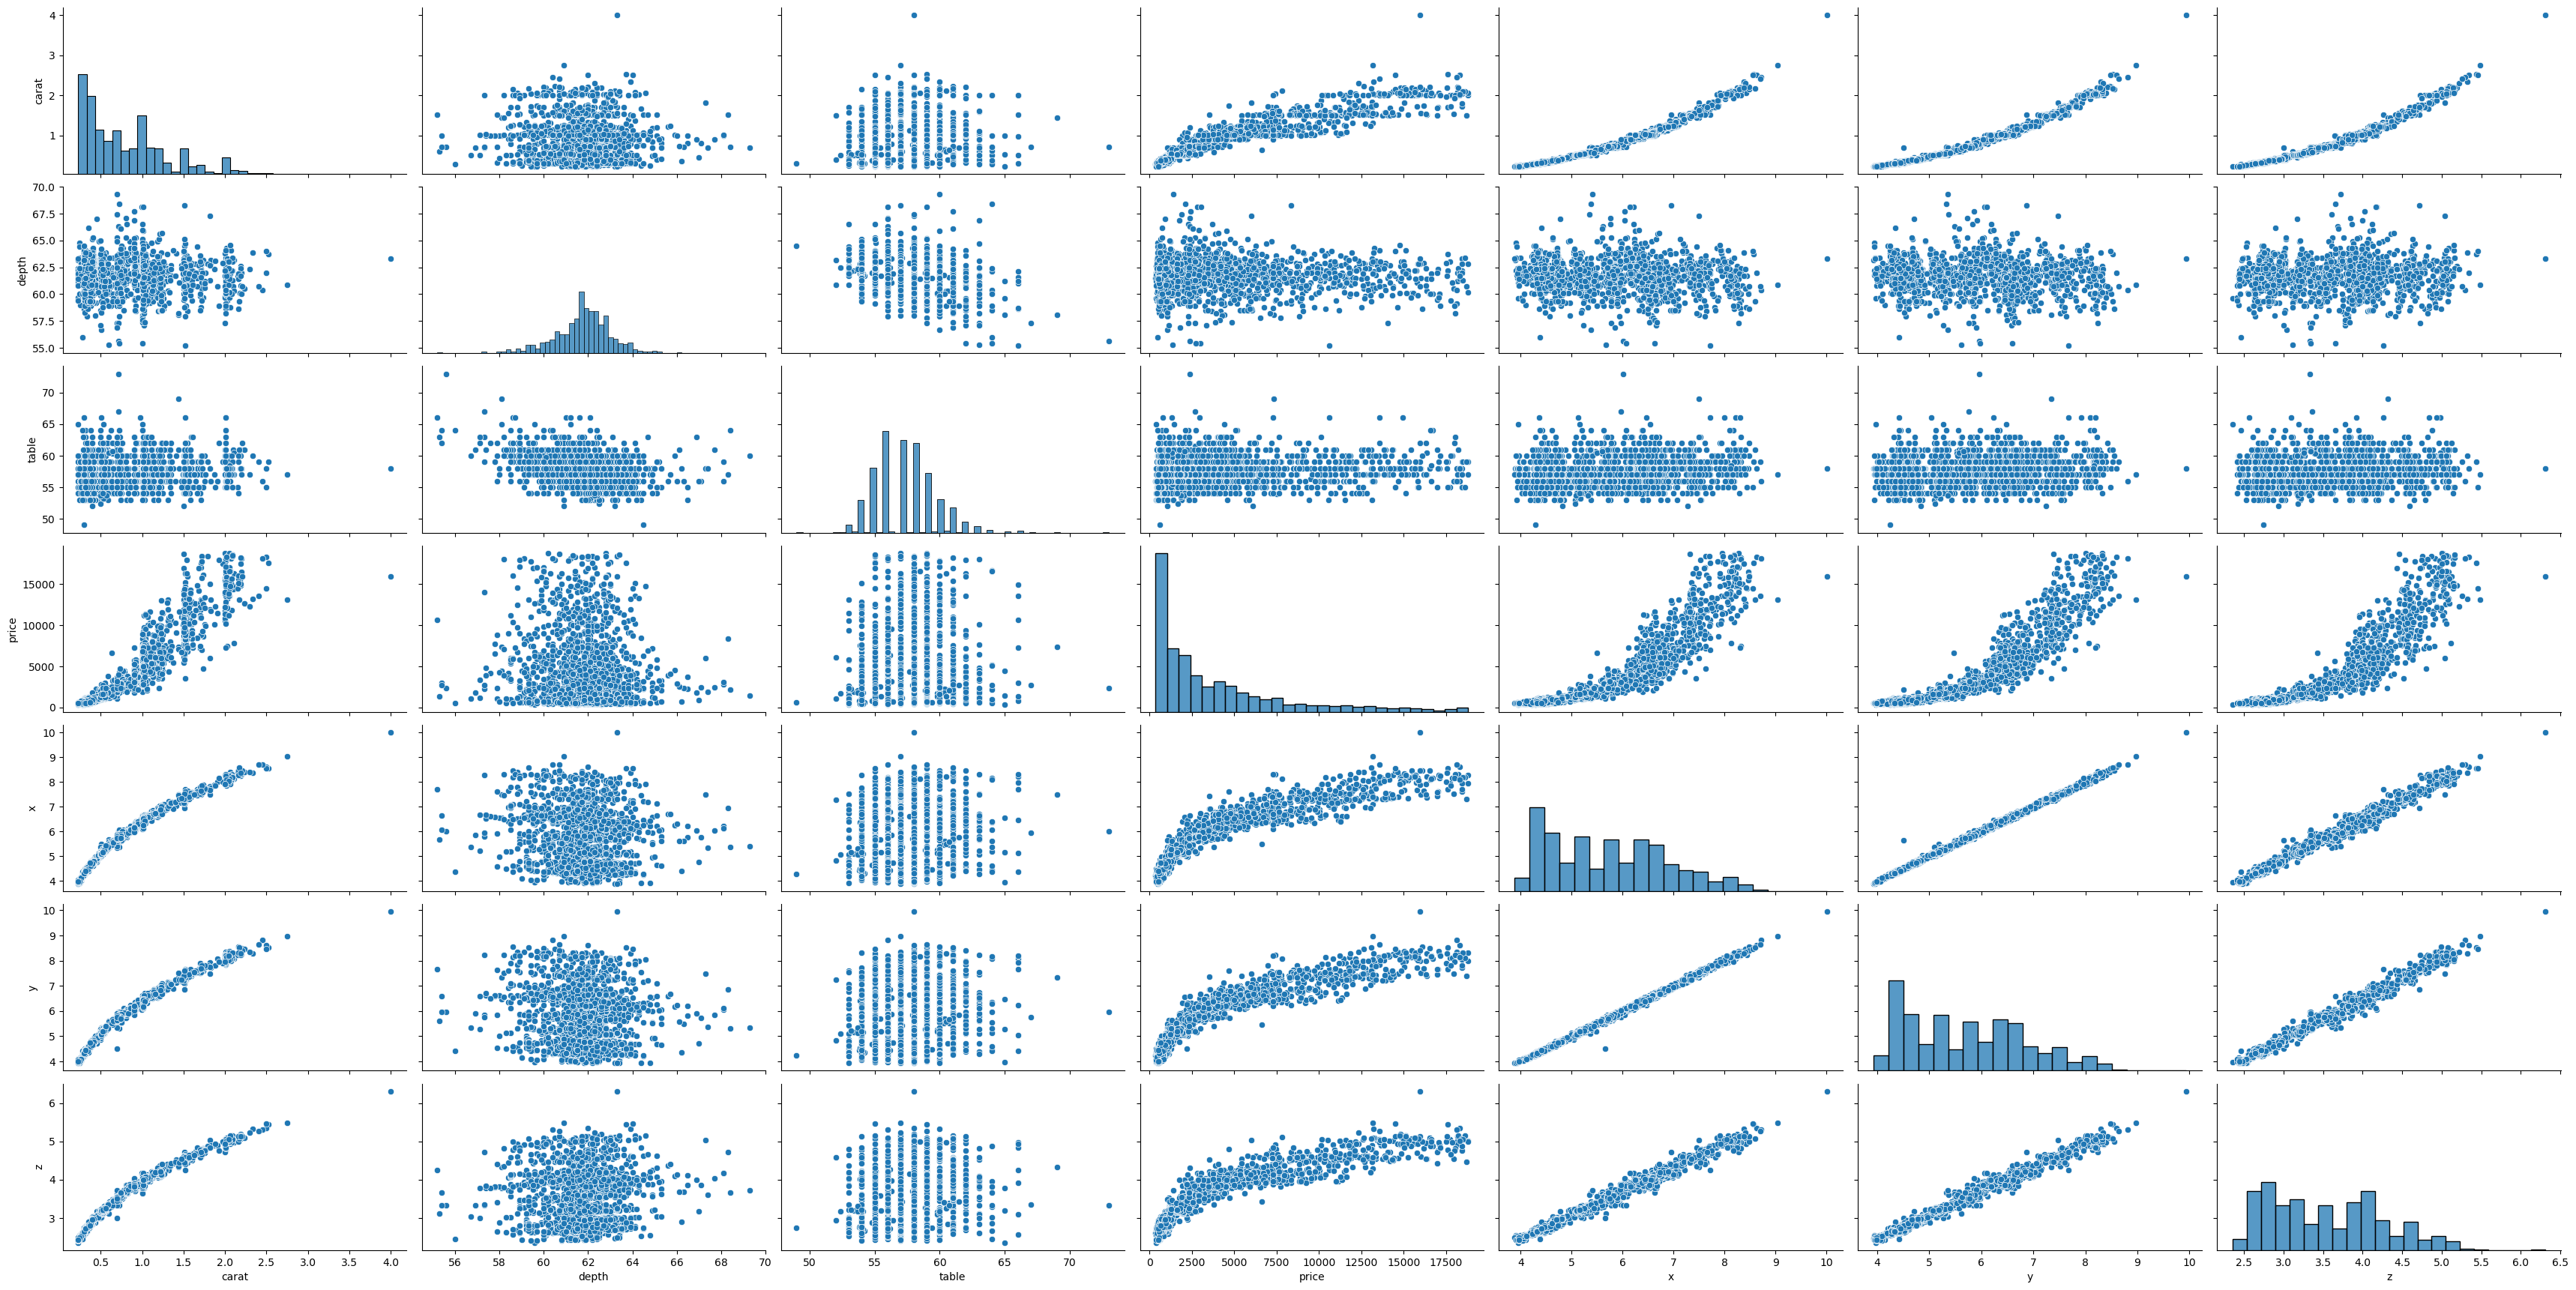

In [275]:
numeric_df = df.select_dtypes(include=['number'])
sns.pairplot(numeric_df.sample(2000, random_state=42),aspect=2)  # Use a smaller sample
plt.show()

# CONCLUSION 

# Numerical Columns:
1. carat (weight of the diamond): Likely positively correlated with price, as larger diamonds are usually more expensive.
2. depth (percentage depth of diamond): Should be within an optimal range for best cut quality.
3. table (width of the diamond’s top surface): Affects light reflection properties.
4. price: The target variable, expected to have non-linear relationships with carat and cut.
5. x, y, z (dimensions of the diamond): Should be consistent with carat; potential outliers (zero values) may exist.
# Categorical Columns:
1. cut: Ordered categories (Fair, Good, Very Good, Premium, Ideal), expected to impact price.
2. color: Ordered from D (best, colorless) to J (least desirable).
3. clarity: Represents internal flaws, ranging from IF (Internally Flawless) to I3 (Included).